# Worksheet 02

Name:  Hao Qi  
UID:  U96305250  

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

A fully functional version of the program is often unavailable until developers have almost finished the work. Consequently, testing the overall system may be challenging, potentially leading to late discoveries of fundamental design flaws or integration issues, especially when there is a need to frequently verify the reasonableness of inputs and outputs during the development process. 

b) What is a drawback of the bottom up approach?

Firstly, it can lead to redundancy, as developers may create multiple similar basic functions without realizing overlap, wasting time and resources. Secondly, these isolated functional blocks can be complex for collaborators to understand, especially without adequate documentation or if designed with a specific focus. Lastly, while this approach allows for early module testing, it doesn't guarantee that these tests will identify integration issues or ensure comprehensive functionality when components are combined. 

c) What are the 3 things you can do to have a better debugging experience?

**Stay Calm and Read the Error**  
Don’t panic; carefully read the error to understand its message and pinpoint where and how it occurs.

**Review the Code Mentally**  
Take time to go through the code to catch potential logic errors. If it is too complex, consider simplifying.

**Sanity Check and Research**  
Verify that the setup is correct, and use online resources for additional help if needed. Try to take breaks when facing a stubborn bug. 

d) (Optional) Follow along with the live coding. You can write your code here:

In [1]:
class Board:
    def __init__(self):
        self.board = [["-" for _ in range(8)] for _ in range(8)]

    def __repr__(self):
        res = ""
        for row in range(8):
            for col in range(8):
                res += self.board[row][col]
                res += " "
            res += "\n"
        return res

    def set_queen_at(self, row, col):
        self.board[row][col] = "Q"

    def unset_queen_on(self, row):
        self.board[row] = ["-" for _ in range(8)]

    def is_valid_row(self, row, col):
        for i in range(8):
            if i!= col and self.board[row][i] == "Q":
                return False
        return True
    
    def is_valid_col(self, row, col):
        for i in range(8):
            if i!= row and self.board[i][col] == "Q":
                return False
        return True
    
    def is_valid_diag(self, row, col):
        for i in range(8):
            for j in range(8):
                if (i+j == row+col or i-j == row-col) and self.board[i][j] == "Q" and (i != row and j != col):
                    return False
        return True

    def is_valid_move(self, row, col):
        if not self.is_valid_row(row, col):
            return False
        if not self.is_valid_col(row, col):
            return False
        if not self.is_valid_diag(row, col):
            return False
        return True
    
    def get_queen_on(self, row):
        for i in range(8):
            if self.board[row][i] == "Q":
                return i
        raise ValueError("No queen on Row {}!".format(row))

    def find_solution(self, row=0):
        # print
        if row == 8:
            print("We have found a solution.")
            print(self)
            return True

        # search
        for i in range(8):
            if self.is_valid_move(row, i):    # top down
                self.set_queen_at(row, i)
                if self.find_solution(row + 1):
                    return True
                self.unset_queen_on(row) 
        return False 


test = Board()
test.find_solution()

We have found a solution.
Q - - - - - - - 
- - - - Q - - - 
- - - - - - - Q 
- - - - - Q - - 
- - Q - - - - - 
- - - - - - Q - 
- Q - - - - - - 
- - - Q - - - - 



True

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and return the DataFrame.

In [41]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [42]:
print("There are " +  str(df[df.isnull().any(axis=1)].shape[0]) + " rows with at least one empty value.")

There are 708 rows with at least one empty value.


c) Complete the code below to remove all columns with more than 200 NaN values

In [43]:
df = df.drop(df.columns[df.isna().sum() > 200], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replace `male` with 0 and `female` with 1

In [44]:
df['Sex'] = df["Sex"].replace({"male": 0, "female": 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [45]:
# the format should be 
#   Last Name, Title, First Name, Middle Name (if exists)
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df["Name"].str.extract(r"(?P<Last_Name>[^,]+), (?P<Title>[^.]+)\. (?P<First_Name>[^\s]+)(?: (?P<Middle_Name>[^(]+))?").reindex(columns=["First_Name", "Middle_Name", "Last_Name", "Title"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Complete the code below to replace all the missing ages with the average age

In [47]:
df['Age'] = df["Age"].fillna(value=df["Age"].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

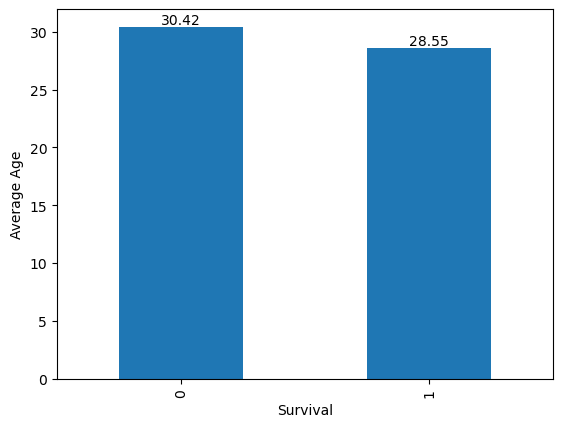

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

group = df.groupby("Survived")  # key-value pairs
chart = group["Age"].mean().plot(kind="bar")
plt.xlabel("Survival")
plt.ylabel('Average Age')
for p in chart.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.text(x, y, "{:.2f}".format(y), ha="center", va="bottom")
plt.show()

The average age of the victims is 30.42, while the average age of the survivors is 28.55, with the former group being two years older than the latter. This could suggest that younger people have a higher survival rate or that there is a higher proportion of younger individuals among the survivors. However, we would need further data analysis to draw more accurate conclusions. 